In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def make_df_into_right_columns(d, samplingmodels = False):
    def nested_dict_to_df(d, path=None):
        """ 
        Convert a nested dictionary with any number of nested dimensions to a pandas DataFrame. 
        Each row represents a unique path through the nested dictionary.
        """
        if path is None:
            path = []

        if isinstance(d, dict):
            rows = []
            for key, value in d.items():
                new_path = path + [key]
                rows.extend(nested_dict_to_df(value, new_path))
            return rows
        else:
            return [path + [d]]

    # Convert the nested dictionary to a list of rows
    rows = nested_dict_to_df(d)

    # Determine the maximum number of columns
    max_cols = max(len(row) for row in rows)

    # Create a DataFrame with appropriate column names
    df_final = pd.DataFrame(rows, columns=[f'Level_{i+1}' for i in range(max_cols - 1)] + ['Value'])
#     display(df_final)
    if samplingmodels:
        df_final[['data shard', 'nbr of shards']] = df_final['Level_1'].apply(pd.Series)
        df_final.drop('Level_1', axis=1, inplace=True)
    return df_final

def make_df_into_right_columns_secondmode(data, acc_col_name = ''):
    df = pd.DataFrame.from_dict(data, orient='index')
    df.index.name = 'data shard'
    df.reset_index(inplace=True)
    
    # Here's a generalized function to transform a similar dataframe
    train_df = df[["data shard", "acc_train"]].rename(columns={"acc_train": acc_col_name})
    train_df["data split"] = "train"

    test_df = df[["data shard", "acc_test"]].rename(columns={"acc_test": acc_col_name})
    test_df["data split"] = "test"

    # Concatenating the train and test dataframes
    transformed_df = pd.concat([train_df, test_df], ignore_index=True)
    
    return transformed_df





In [3]:
with open('global_accuracies_samplingmodels_5beams.pkl', 'rb') as file:
    ga_samplingModels_5beams = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)

with open('global_accuracies_5beams.pkl', 'rb') as file:
    ga_5beams = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)
    
with open('global_accuracies_samplingmodels_5beams_probabilities.pkl', 'rb') as file:
    ga_samplingModels_5beams_probs = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)
    

# To load and optionally convert back to defaultdict
# (You'll need to redefine your defaultdict structure as before)
with open('localnglobal_accuracies_allgroups_allpeers.pkl', 'rb') as file:
    ga_1beam = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)

In [4]:
with open('global_accuracies_samplingmodels.pkl', 'rb') as file:
    ga_samplingModels_1beam = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)
    
with open('global_accuracies_samplingmodels_probabilities.pkl', 'rb') as file:
    ga_samplingModels_1beam_probs = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)

with open('accuracies_samplingmodels_1beam_intragroup.pkl', 'rb') as file:
    ga_samplingModels_1beam_intragroup = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)
       
with open('accuracies_samplingmodels_1beam_probabilities_intragroup.pkl', 'rb') as file:
    ga_samplingModels_1beam_probs_intragroup = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)  
    

with open('accuracies_samplingmodels_5beams_intragroup.pkl', 'rb') as file:
    ga_samplingModels_5beams_intragroup = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)  
    

with open('accuracies_samplingmodels_5beams_probabilities_intragroup.pkl', 'rb') as file:
    ga_samplingModels_5beams_probs_intragroup = pickle.load(file)
    # Optionally convert back to defaultdict
    # my_defaultdict = convert_to_defaultdict(loaded_dict)  

In [5]:
print (ga_samplingModels_5beams_probs_intragroup)
print (ga_samplingModels_5beams_intragroup)
print (ga_samplingModels_1beam_probs_intragroup)
print (ga_samplingModels_1beam_intragroup)

{1: {'acc_test': 0.9467322643343051, 'acc_train': 0.997631195335277}, 3: {'acc_test': 0.9497421134700732, 'acc_train': 0.9980808444284515}, 2: {'acc_test': 0.943043453170985, 'acc_train': 0.9982687979687229}}
{3: {'acc_train': 0.9999399291163573, 'acc_test': 0.9535204510015594}, 1: {'acc_train': 0.9996957156767283, 'acc_test': 0.9482507288629738}, 2: {'acc_train': 0.9995378660967015, 'acc_test': 0.9451786023428934}}
{1: {'acc_test': 0.9129616132167152, 'acc_train': 0.9923469387755102}, 3: {'acc_test': 0.9224541201871177, 'acc_train': 0.9939426652273}, 2: {'acc_test': 0.9121126435455018, 'acc_train': 0.9938830861561544}}
{3: {'acc_train': 0.9962756052141527, 'acc_test': 0.9232337771380592}, 1: {'acc_train': 0.9939143135345667, 'acc_test': 0.915877065111759}, 2: {'acc_train': 0.9951475940153659, 'acc_test': 0.9151133937330487}}


In [6]:
ga_samplingModels_1beam

{1: {'acc_test': 0.844327016520894},
 3: {'acc_test': 0.46353604414057814},
 2: {'acc_test': 0.5955334987593052}}

In [7]:
ga_samplingModels_5beams

{1: {'acc_test': 0.9313654033041788},
 3: {'acc_test': 0.9280916396785415},
 2: {'acc_test': 0.9215765479831496}}

In [8]:
ga_1beam = make_df_into_right_columns(ga_1beam)
ga_5beams = make_df_into_right_columns(ga_5beams)


ga_samplingModels_5beams = make_df_into_right_columns(ga_samplingModels_5beams, False)
ga_samplingModels_5beams_probs = make_df_into_right_columns(ga_samplingModels_5beams_probs, False)
ga_samplingModels_1beam = make_df_into_right_columns(ga_samplingModels_1beam, False)
ga_samplingModels_1beam_probs = make_df_into_right_columns(ga_samplingModels_1beam_probs, False)


ga_samplingModels_1beam_intragroup = make_df_into_right_columns_secondmode(ga_samplingModels_1beam_intragroup, 'integral suggestions')
ga_samplingModels_1beam_probs_intragroup = make_df_into_right_columns_secondmode(ga_samplingModels_1beam_probs_intragroup, 'probabilistic suggestions')
ga_samplingModels_5beams_intragroup = make_df_into_right_columns_secondmode(ga_samplingModels_5beams_intragroup, 'integral suggestions')
ga_samplingModels_5beams_probs_intragroup = make_df_into_right_columns_secondmode(ga_samplingModels_5beams_probs_intragroup, 'probabilistic suggestions')


In [9]:
# Normalizing format to not rewrite code
ga_samplingModels_1beam_probs['Level_2'] = 'acc_test'

In [10]:
print ("ga_1beam",ga_1beam.columns)
print ('ga_5beams',ga_5beams.columns)
print ('ga_samplingModels_5beams',ga_samplingModels_5beams.columns)
print ('ga_samplingModels_5beams_probs',ga_samplingModels_5beams_probs.columns)
print ('ga_samplingModels_1beam',ga_samplingModels_1beam.columns)
print ('ga_samplingModels_1beam_probs',ga_samplingModels_1beam_probs.columns)
print ('ga_samplingModels_1beam_intragroup',ga_samplingModels_1beam_intragroup.columns)
print ('ga_samplingModels_1beam_probs_intragroup',ga_samplingModels_1beam_probs_intragroup.columns)
print ('ga_samplingModels_5beams_intragroup',ga_samplingModels_5beams_intragroup.columns)
print ('ga_samplingModels_5beams_probs_intragroup',ga_samplingModels_5beams_probs_intragroup.columns)

ga_1beam Index(['Level_1', 'Level_2', 'Level_3', 'Level_4', 'Value'], dtype='object')
ga_5beams Index(['Level_1', 'Level_2', 'Level_3', 'Level_4', 'Value'], dtype='object')
ga_samplingModels_5beams Index(['Level_1', 'Level_2', 'Value'], dtype='object')
ga_samplingModels_5beams_probs Index(['Level_1', 'Level_2', 'Value'], dtype='object')
ga_samplingModels_1beam Index(['Level_1', 'Level_2', 'Value'], dtype='object')
ga_samplingModels_1beam_probs Index(['Level_1', 'Value', 'Level_2'], dtype='object')
ga_samplingModels_1beam_intragroup Index(['data shard', 'integral suggestions', 'data split'], dtype='object')
ga_samplingModels_1beam_probs_intragroup Index(['data shard', 'probabilistic suggestions', 'data split'], dtype='object')
ga_samplingModels_5beams_intragroup Index(['data shard', 'integral suggestions', 'data split'], dtype='object')
ga_samplingModels_5beams_probs_intragroup Index(['data shard', 'probabilistic suggestions', 'data split'], dtype='object')


In [11]:
ga_1beam = ga_1beam.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'peer', 
                              'Level_3':'split', 'Level_4':'pers',
                             'dataset_group': 'data shard'}
                            )
ga_5beams = ga_5beams.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'peer', 
                              'Level_3':'split', 'Level_4':'pers',
                             'dataset_group': 'data shard'}
                            )
ga_samplingModels_5beams = ga_samplingModels_5beams.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'data split', 
                              'Value': 'integral suggestions',
                             'dataset_group': 'data shard'}
                            )
ga_samplingModels_5beams_probs = ga_samplingModels_5beams_probs.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'data split', 
                              'Value': 'probabilistic suggestions',
                             'dataset_group': 'data shard'}
                            )

ga_samplingModels_1beam = ga_samplingModels_1beam.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'data split', 
                              'Value': 'integral suggestions'}
                            )
ga_samplingModels_1beam_probs = ga_samplingModels_1beam_probs.rename(columns = 
                             {'Level_1':'data shard', 'Level_2': 'data split', 
                              'Value': 'probabilistic suggestions'}
                            )

ga_samplingModels_1beam_intragroup['beams'] = 1
ga_samplingModels_1beam_probs_intragroup['beams'] = 1
ga_samplingModels_5beams_intragroup['beams'] = 5
ga_samplingModels_5beams_probs_intragroup['beams'] = 5

ga_samplingModels_1beam_intragroup['beams'] = 1
ga_samplingModels_1beam_probs_intragroup['beams'] = 1
ga_samplingModels_5beams_intragroup['beams'] = 5
ga_samplingModels_5beams_probs_intragroup['beams'] = 5

In [12]:
ga_1beam

,data shard,peer,split,pers,Value
0,1,8090,train,local,0.983544
1,1,8090,train,global,0.980587
2,1,8090,test,local,0.902367
3,1,8090,test,global,0.889456
4,1,8091,train,local,0.981773
...,...,...,...,...,...
115,3,8098,test,global,0.894147
116,3,8099,train,local,0.984178
117,3,8099,train,global,0.982700
118,3,8099,test,local,0.906428


In [13]:
print ("ga_1beam",ga_1beam.columns)
print ('ga_5beams',ga_5beams.columns)
print ('ga_samplingModels_5beams',ga_samplingModels_5beams.columns)
print ('ga_samplingModels_5beams_probs',ga_samplingModels_5beams_probs.columns)
print ('ga_samplingModels_1beam',ga_samplingModels_1beam.columns)
print ('ga_samplingModels_1beam_probs',ga_samplingModels_1beam_probs.columns)
print ('ga_samplingModels_1beam_intragroup',ga_samplingModels_1beam_intragroup.columns)
print ('ga_samplingModels_1beam_probs_intragroup',ga_samplingModels_1beam_probs_intragroup.columns)
print ('ga_samplingModels_5beams_intragroup',ga_samplingModels_5beams_intragroup.columns)
print ('ga_samplingModels_5beams_probs_intragroup',ga_samplingModels_5beams_probs_intragroup.columns)

ga_1beam Index(['data shard', 'peer', 'split', 'pers', 'Value'], dtype='object')
ga_5beams Index(['data shard', 'peer', 'split', 'pers', 'Value'], dtype='object')
ga_samplingModels_5beams Index(['data shard', 'data split', 'integral suggestions'], dtype='object')
ga_samplingModels_5beams_probs Index(['data shard', 'data split', 'probabilistic suggestions'], dtype='object')
ga_samplingModels_1beam Index(['data shard', 'data split', 'integral suggestions'], dtype='object')
ga_samplingModels_1beam_probs Index(['data shard', 'probabilistic suggestions', 'data split'], dtype='object')
ga_samplingModels_1beam_intragroup Index(['data shard', 'integral suggestions', 'data split', 'beams'], dtype='object')
ga_samplingModels_1beam_probs_intragroup Index(['data shard', 'probabilistic suggestions', 'data split', 'beams'], dtype='object')
ga_samplingModels_5beams_intragroup Index(['data shard', 'integral suggestions', 'data split', 'beams'], dtype='object')
ga_samplingModels_5beams_probs_intragroup

In [14]:
ga_samplingModels_1beam_intragroup


,data shard,integral suggestions,data split,beams
0,3,0.996276,train,1
1,1,0.993914,train,1
2,2,0.995148,train,1
3,3,0.923234,test,1
4,1,0.915877,test,1
5,2,0.915113,test,1


In [15]:
ga_sm_5bms = ga_samplingModels_5beams.merge(ga_samplingModels_5beams_probs, 
        left_on = ['data shard', 'data split'],
       right_on = ['data shard', 'data split'], how = 'inner')

ga_sm_5bms[['integral suggestions','probabilistic suggestions']] = ga_sm_5bms[['integral suggestions','probabilistic suggestions']].astype(float)
ga_sm_5bms['diff'] = ga_sm_5bms['probabilistic suggestions'] - ga_sm_5bms['integral suggestions']


ga_sm_1bm_ig = ga_samplingModels_1beam_intragroup.merge(ga_samplingModels_1beam_probs_intragroup, 
        left_on = ['data shard', 'data split', 'beams'],
       right_on = ['data shard', 'data split', 'beams'], how = 'inner')


ga_sm_5bms_ig = ga_samplingModels_5beams_intragroup.merge(ga_samplingModels_5beams_probs_intragroup, 
        left_on = ['data shard', 'data split', 'beams'],
       right_on = ['data shard', 'data split', 'beams'], how = 'inner')


ga_sm_ig = pd.concat([ga_sm_1bm_ig,ga_sm_5bms_ig])
ga_sm_ig['diff'] = ga_sm_ig['probabilistic suggestions'] - ga_sm_ig['integral suggestions']
ga_sm_ig['nbr of shards'] = 1



In [16]:
ga_sm_ig = ga_sm_ig[ga_sm_ig['data split'] == 'test'][[
    'data shard', 'beams', 'integral suggestions', 'probabilistic suggestions', 'diff','nbr of shards']]
# ga_sm_5bms[ga_sm_5bms

In [17]:
ga_sm_1bm = ga_samplingModels_1beam.merge(ga_samplingModels_1beam_probs, 
        left_on = ['data shard', 'data split'],
       right_on = ['data shard', 'data split'], how = 'inner')

ga_sm_1bm[['integral suggestions','probabilistic suggestions']] = ga_sm_1bm[['integral suggestions','probabilistic suggestions']].astype(float)
ga_sm_1bm['diff'] = ga_sm_1bm['probabilistic suggestions'] - ga_sm_1bm['integral suggestions']

ga_sm_1bm['beams'] = 1
ga_sm_5bms['beams'] = 5


ga_sm_ig = ga_sm_ig.drop(columns = ['integral suggestions','diff', 'nbr of shards']).rename(
    columns = {'probabilistic suggestions': 'ensemble accuracy', 'beams':'topk'})


ga_sm_interg = pd.concat([ga_sm_1bm,ga_sm_5bms])
ga_sm_interg = ga_sm_interg.drop(columns = ['data split','integral suggestions','diff']).rename(
    columns = {'probabilistic suggestions': 'ensemble accuracy', 'beams':'topk'})

In [18]:

# ga_sm_interg['nbr of shards'] = ga_sm_interg['nbr of shards'].replace({'two': 2, 'three': 3})



In [19]:

display(ga_sm_ig[['data shard','topk', 'ensemble accuracy']].sort_values(['data shard', 'topk']))


,data shard,topk,ensemble accuracy
4,1,1,0.912962
4,1,5,0.946732
5,2,1,0.912113
5,2,5,0.943043
3,3,1,0.922454
3,3,5,0.949742


Above we can see the intra-group ensemble, where peers were chosen from a pool belonging to the same shard

In [20]:
display(ga_sm_interg[['data shard','topk', 'ensemble accuracy']].sort_values(['data shard', 'topk']))


,data shard,topk,ensemble accuracy
0,1,1,0.848639
0,1,5,0.932702
2,2,1,0.849501
2,2,5,0.931618
1,3,1,0.871836
1,3,5,0.940506


Above we can see inter-group ensemble, where peers were chosen from a pool belonging to different shards, 3 peers sampled from each of the three shards.

In [21]:
ga_sm_ig['model pool'] = 'Only belonging to shard '
ga_sm_interg['model pool'] = 'Belonging to all 3 shards'

In [22]:
df_total = pd.concat([ga_sm_interg, ga_sm_ig])

df_total['data shard'] = df_total['data shard'].replace({1: 'A', 2: 'B', 3: 'C'})

ga_sm_ig['model pool'] = 'Only belonging to shard' + ga_sm_ig['data shard'].astype(str)

In [23]:
df_total

,data shard,ensemble accuracy,topk,model pool
0,A,0.848639,1,Belonging to all 3 shards
1,C,0.871836,1,Belonging to all 3 shards
2,B,0.849501,1,Belonging to all 3 shards
0,A,0.932702,5,Belonging to all 3 shards
1,C,0.940506,5,Belonging to all 3 shards
2,B,0.931618,5,Belonging to all 3 shards
3,C,0.922454,1,Only belonging to shard
4,A,0.912962,1,Only belonging to shard
5,B,0.912113,1,Only belonging to shard
3,C,0.949742,5,Only belonging to shard


In [24]:
df_total.round(3).to_latex(float_format="%.3f", index = False)

'\\begin{tabular}{lrrl}\n\\toprule\ndata shard & ensemble accuracy & topk & model pool \\\\\n\\midrule\nA & 0.849 & 1 & Belonging to all 3 shards \\\\\nC & 0.872 & 1 & Belonging to all 3 shards \\\\\nB & 0.850 & 1 & Belonging to all 3 shards \\\\\nA & 0.933 & 5 & Belonging to all 3 shards \\\\\nC & 0.941 & 5 & Belonging to all 3 shards \\\\\nB & 0.932 & 5 & Belonging to all 3 shards \\\\\nC & 0.922 & 1 & Only belonging to shard  \\\\\nA & 0.913 & 1 & Only belonging to shard  \\\\\nB & 0.912 & 1 & Only belonging to shard  \\\\\nC & 0.950 & 5 & Only belonging to shard  \\\\\nA & 0.947 & 5 & Only belonging to shard  \\\\\nB & 0.943 & 5 & Only belonging to shard  \\\\\n\\bottomrule\n\\end{tabular}\n'

In [26]:
ga_samplingModels_5beams

,data shard,data split,integral suggestions
0,1,acc_test,0.931365
1,3,acc_test,0.928092
2,2,acc_test,0.921577


In [27]:
ga_5beams['beams'] = 5
ga_1beam['beams'] = 1

ga = pd.concat([ga_1beam,ga_5beams])
ga['data shard'] = ga['data shard'].astype(int)
ga['peer'] = ga['peer'].astype(int)
ga.loc[ga['peer']>8000, 'peer'] = ga.loc[ga['peer']>8000, 'peer'] - 8089
ga_samplingModels_5beams['data split'] = ga_samplingModels_5beams['data split'].apply(lambda x: x.split('_')[1])

In [28]:
ga_1beam

,data shard,peer,split,pers,Value,beams
0,1,8090,train,local,0.983544,1
1,1,8090,train,global,0.980587,1
2,1,8090,test,local,0.902367,1
3,1,8090,test,global,0.889456,1
4,1,8091,train,local,0.981773,1
...,...,...,...,...,...,...
115,3,8098,test,global,0.894147,1
116,3,8099,train,local,0.984178,1
117,3,8099,train,global,0.982700,1
118,3,8099,test,local,0.906428,1


,data shard,peer,split,pers,Value,beams
3,1,8090,test,global,0.889456,1
7,1,8091,test,global,0.881742,1
11,1,8092,test,global,0.870505,1
15,1,8093,test,global,0.881560,1
19,1,8094,test,global,0.882653,1
23,1,8095,test,global,0.886358,1
27,1,8096,test,global,0.865039,1
31,1,8097,test,global,0.879009,1
35,1,8098,test,global,0.880649,1
39,1,8099,test,global,0.813715,1


,data shard,peer,split,pers,Value,beams
43,2,8090,test,global,0.878181,1
47,2,8091,test,global,0.867217,1
51,2,8092,test,global,0.874372,1
55,2,8093,test,global,0.866640,1
59,2,8094,test,global,0.870795,1
63,2,8095,test,global,0.879162,1
67,2,8096,test,global,0.882567,1
71,2,8097,test,global,0.866236,1
75,2,8098,test,global,0.878412,1
79,2,8099,test,global,0.877431,1


,data shard,peer,split,pers,Value,beams
83,3,8090,test,global,0.897205,1
87,3,8091,test,global,0.892947,1
91,3,8092,test,global,0.880473,1
95,3,8093,test,global,0.893847,1
99,3,8094,test,global,0.885870,1
103,3,8095,test,global,0.894986,1
107,3,8096,test,global,0.870697,1
111,3,8097,test,global,0.894386,1
115,3,8098,test,global,0.894147,1
119,3,8099,test,global,0.890368,1


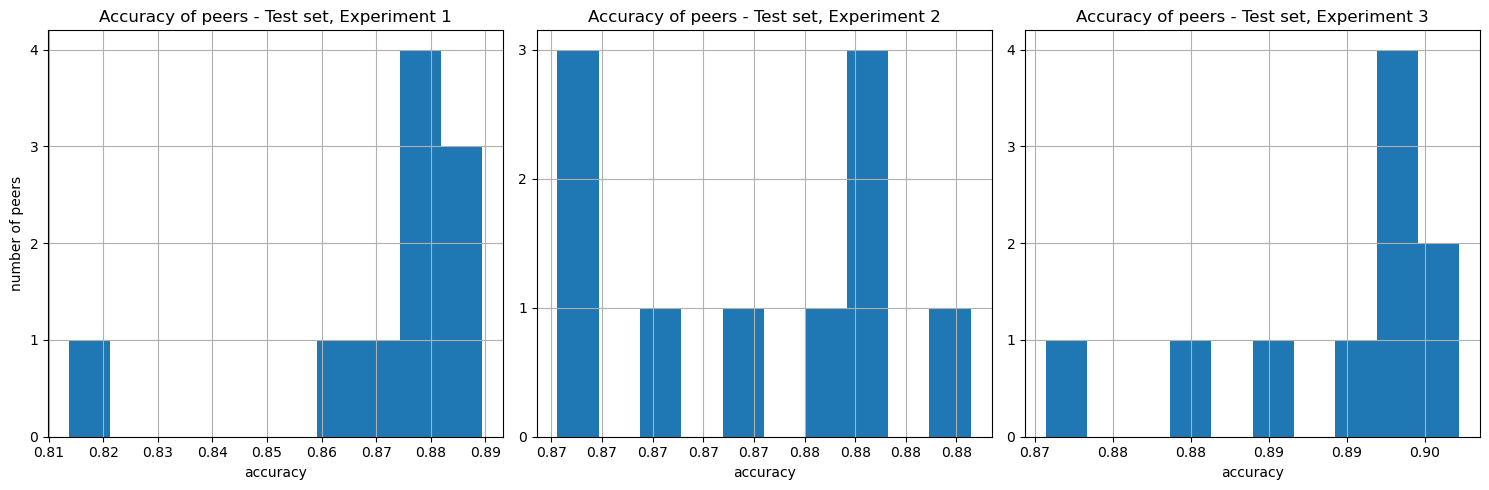

In [29]:
# Creating the plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_ylabel('number of peers')
for i in range(1, 4):
    ga_1beam[(ga_1beam['data shard'] == str(i))
             &
             (ga_1beam['split'] == 'test')
             &
             (ga_1beam['pers'] == 'global')].hist(column='Value', ax=axes[i-1])
    axes[i-1].set_title(f'Accuracy of peers - Test set, Experiment {i}')
    axes[i-1].set_xlabel('accuracy')
    # Setting y-axis ticks to integer values
    start, end = axes[i-1].get_ylim()
    axes[i-1].yaxis.set_ticks(np.arange(start, end, 1))
    axes[i-1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
     # Setting x-axis ticks to show two decimal places
    start_x, end_x = axes[i-1].get_xlim()
    axes[i-1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    display(ga_1beam[(ga_1beam['data shard'] == str(i))
             &
             (ga_1beam['split'] == 'test')
             &
             (ga_1beam['pers'] == 'global')])



plt.tight_layout()
plt.show()

/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/1127508866.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams
1,1,1,test,global,0.927782,5
3,1,7,test,global,0.914966,5
5,1,10,test,global,0.891460,5
7,1,3,test,global,0.918671,5
9,1,8,test,global,0.923409,5
11,1,9,test,global,0.924198,5
13,1,5,test,global,0.924138,5
15,1,6,test,global,0.928936,5
17,1,4,test,global,0.923348,5
19,1,2,test,global,0.927539,5


/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/1127508866.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams
41,3,3,test,global,0.919815,5
43,3,1,test,global,0.931390,5
45,3,9,test,global,0.931690,5
47,3,7,test,global,0.918676,5
49,3,10,test,global,0.927492,5
51,3,6,test,global,0.931450,5
53,3,2,test,global,0.929291,5
55,3,4,test,global,0.931990,5
57,3,8,test,global,0.933429,5
59,3,5,test,global,0.925693,5


/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/1127508866.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams


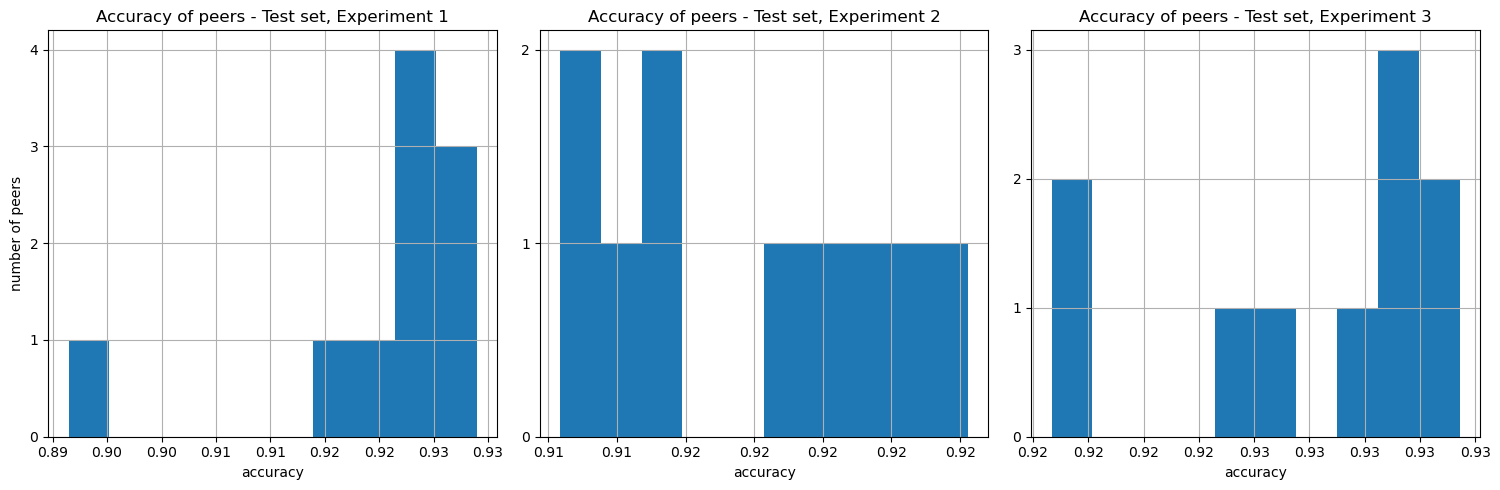

In [30]:
# Creating the plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].set_ylabel('number of peers')
for i in range(1, 4):
    ga_5beams[(ga_5beams['data shard'] == str(i))
             &
             (ga_5beams['split'] == 'test')].hist(column='Value', ax=axes[i-1])
    axes[i-1].set_title(f'Accuracy of peers - Test set, Experiment {i}')
    axes[i-1].set_xlabel('accuracy')
    # Setting y-axis ticks to integer values
    start, end = axes[i-1].get_ylim()
    axes[i-1].yaxis.set_ticks(np.arange(start, end, 1))
    axes[i-1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
     # Setting x-axis ticks to show two decimal places
    start_x, end_x = axes[i-1].get_xlim()
    axes[i-1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    display(ga_5beams[(ga_1beam['data shard'] == str(i))
             &
             (ga_5beams['split'] == 'test')])



plt.tight_layout()
plt.show()

/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/807768462.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams
1,1,1,test,global,0.927782,5
3,1,7,test,global,0.914966,5
5,1,10,test,global,0.891460,5
7,1,3,test,global,0.918671,5
9,1,8,test,global,0.923409,5
11,1,9,test,global,0.924198,5
13,1,5,test,global,0.924138,5
15,1,6,test,global,0.928936,5
17,1,4,test,global,0.923348,5
19,1,2,test,global,0.927539,5


/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/807768462.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams
41,3,3,test,global,0.919815,5
43,3,1,test,global,0.931390,5
45,3,9,test,global,0.931690,5
47,3,7,test,global,0.918676,5
49,3,10,test,global,0.927492,5
51,3,6,test,global,0.931450,5
53,3,2,test,global,0.929291,5
55,3,4,test,global,0.931990,5
57,3,8,test,global,0.933429,5
59,3,5,test,global,0.925693,5


/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/807768462.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  display(ga_5beams[(ga_1beam['data shard'] == str(i))


,data shard,peer,split,pers,Value,beams


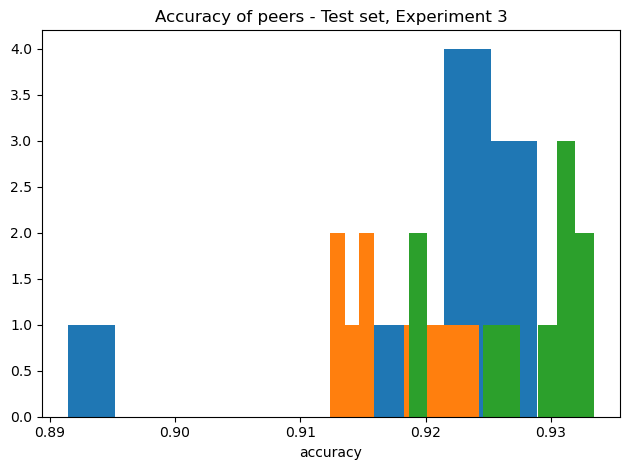

In [31]:
# Creating the plots
for i in range(1, 4):
    plt.hist(
#         ga_5beams[(ga_5beams['group'] == str(i))
#              &
#              (ga_5beams['split'] == 'test')]['peer'],
                ga_5beams[(ga_5beams['data shard'] == str(i))
             &
             (ga_5beams['split'] == 'test')]['Value'])
    plt.title(f'Accuracy of peers - Test set, Experiment {i}')
    plt.xlabel('accuracy')
    # Setting y-axis ticks to integer values
#     start, end = axes[i-1].get_ylim()
#     plt.yaxis.set_ticks(np.arange(start, end, 1))
#     plt.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
    
     # Setting x-axis ticks to show two decimal places
#     start_x, end_x = axes[i-1].get_xlim()
#     plt.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.2f}'.format(x)))
    display(ga_5beams[(ga_1beam['data shard'] == str(i))
             &
             (ga_5beams['split'] == 'test')])



plt.tight_layout()
plt.show()

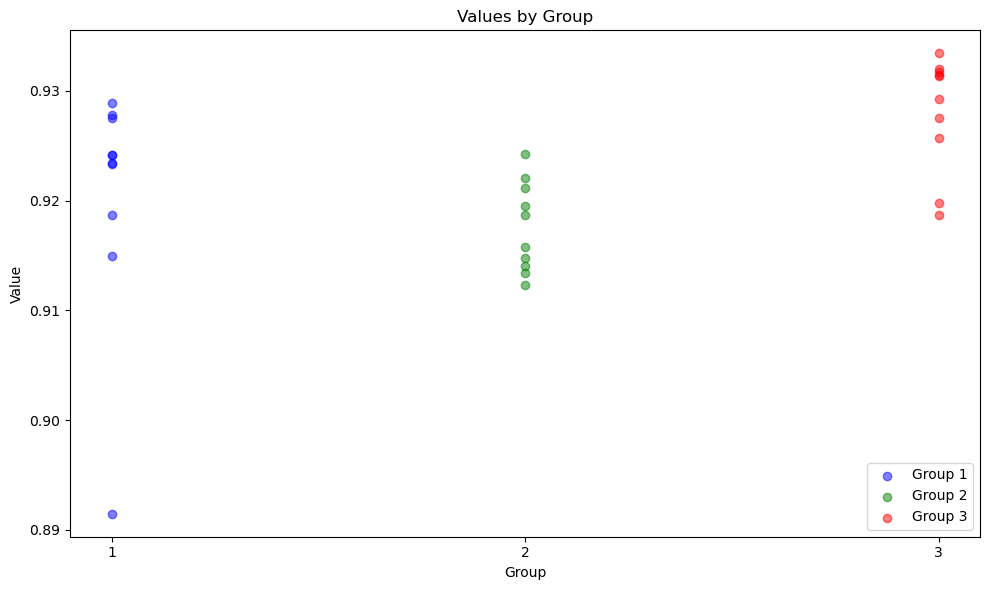

In [32]:
import matplotlib.pyplot as plt

# Assuming 'ga_5beams' is your DataFrame

# Define colors for each group
colors = ['blue', 'green', 'red']  # You can change these colors

# Creating the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for i, color in zip(range(1, 4), colors):
    # Filter the data for each group
    group_data = ga_5beams[(ga_5beams['data shard'] == str(i)) & (ga_5beams['split'] == 'test')]
    
    # Scatter plot for each group
    plt.scatter([i] * len(group_data), group_data['Value'], color=color, alpha=0.5, label=f'Group {i}')

plt.title('Values by Group')
plt.xlabel('Group')
plt.ylabel('Value')
plt.xticks([1, 2, 3])  # Assuming there are 3 groups
plt.legend()

plt.tight_layout()
plt.show()


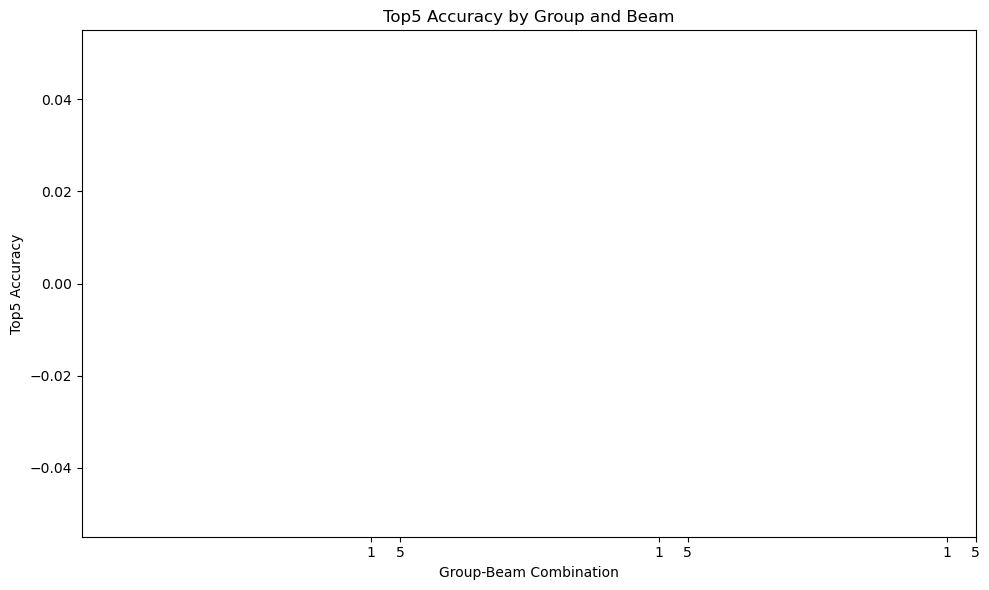

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Filter the data for test split
test_data = ga[ga['split'] == 'test']

# Define colors for each group
group_colors = ['blue', 'green', 'red']  # Colors for groups
beam_colors = ['blue', 'green']  # Colors for beams 1 and 5

# Creating the scatter plot
plt.figure(figsize=(10, 6))

# Plotting each group and beam combination
for i, group_color in zip(range(1, 4), group_colors):
    for j, beam_color in enumerate(beam_colors):
        # Filter the data for each group and beam
        group_beam_data = test_data[(test_data['data shard'] == str(i)) & (test_data['beams'] == [1, 5][j])]
        
        # Adjusting the x-position for beams 1 and 5
        x_positions = np.full(len(group_beam_data), i + j*0.1 - 0.05)

        # Scatter plot for each group and beam
        plt.scatter(x_positions, group_beam_data['Value'], color=beam_color,
                    label=f'Group {i}, Beam {[1, 5][j]}'
                   )

plt.title('Top5 Accuracy by Group and Beam')
plt.xlabel('Group-Beam Combination')
plt.ylabel('Top5 Accuracy')
plt.xticks([0.95, 1.05, 1.95, 2.05, 2.95, 3.05], [1, 5, 1, 5, 1, 5])  # Custom x-ticks to show group and beam
# plt.legend()

plt.tight_layout()
plt.show()



In [34]:
test_data['beams'] = 'K = ' + test_data['beams'].astype(str)

/var/folders/0b/3462gt7j2kj7jggjmz_v1m5h0000gn/T/ipykernel_23482/873700252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['beams'] = 'K = ' + test_data['beams'].astype(str)


In [35]:
test_data = test_data.rename(columns = {'data shard':' '})

In [36]:
test_data

,,peer,split,pers,Value,beams
2,1,1,test,local,0.902367,K = 1
3,1,1,test,global,0.889456,K = 1
6,1,2,test,local,0.879234,K = 1
7,1,2,test,global,0.881742,K = 1
10,1,3,test,local,0.853998,K = 1
...,...,...,...,...,...,...
51,3,6,test,global,0.931450,K = 5
53,3,2,test,global,0.929291,K = 5
55,3,4,test,global,0.931990,K = 5
57,3,8,test,global,0.933429,K = 5


In [37]:
test_data = test_data.rename(columns = {' ': 'shard'})

In [39]:
test_data

,shard,peer,split,pers,Value,beams
2,1,1,test,local,0.902367,K = 1
3,1,1,test,global,0.889456,K = 1
6,1,2,test,local,0.879234,K = 1
7,1,2,test,global,0.881742,K = 1
10,1,3,test,local,0.853998,K = 1
...,...,...,...,...,...,...
51,3,6,test,global,0.931450,K = 5
53,3,2,test,global,0.929291,K = 5
55,3,4,test,global,0.931990,K = 5
57,3,8,test,global,0.933429,K = 5


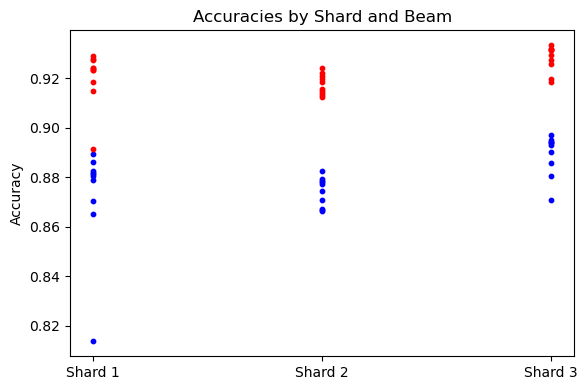

In [39]:
# Colors for each beam type
beam_colors = {'K = 1': 'blue', 'K = 5': 'red'}

# Initialize the Matplotlib figure
fig, ax = plt.subplots(figsize=(6, 4))

# Iterate over the unique shards
for shard in test_data['shard'].unique():
    shard_data = test_data[test_data['shard'] == shard]
    for beam in shard_data['beams'].unique():
        # Select data for the current beam within the current shard
        beam_data = shard_data[(shard_data['pers'] == 'global') & (shard_data['beams'] == beam)]
        # Scatter plot for this subset
        ax.scatter([shard] * len(beam_data), beam_data['Value'], 
                   s = 10,
                   color=beam_colors[beam], label=beam if shard == 1 else "")

# Adjust the x-ticks and labels
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Shard 1', 'Shard 2', 'Shard 3'])

plt.title('Accuracies by Shard and Beam')
plt.ylabel('Accuracy')
# Ensure legend handles are unique
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# Manually adding legend based on tracked labels
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=beam, 
                              markerfacecolor=color, markersize=10) for beam, color in beam_colors.items()]
# ax.legend(handles=legend_elements, title='TopK Accuracy')

plt.tight_layout()


tikzplotlib.save("Accs per shard - exp3.tex")
plt.show()

In [122]:
test_data

,shard,peer,split,pers,Value,beams
2,1,1,test,local,0.902367,K = 1
3,1,1,test,global,0.889456,K = 1
6,1,2,test,local,0.879234,K = 1
7,1,2,test,global,0.881742,K = 1
10,1,3,test,local,0.853998,K = 1
...,...,...,...,...,...,...
51,3,6,test,global,0.931450,K = 5
53,3,2,test,global,0.929291,K = 5
55,3,4,test,global,0.931990,K = 5
57,3,8,test,global,0.933429,K = 5
